In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"


  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-bn0rjsip
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-bn0rjsip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.3MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.2.8-cp37-none-any.whl size=58125 sha256=c06c626c45f4ca8bb669bbcde8c87f96eb109ced9af92d6bf46ac287094765aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-e39jyx6t/wheels/5a/29/25/58347b486c135e3aaa41f629bace08cfb3e92d08c65d2b4acf
Successfully built neuralprophet
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from neuralprophet.utils import fcst_df_to_last_forecast

In [3]:
#import pandas as pd
#from fbprophet import Prophet
import os
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import set_random_seed 
set_random_seed(0)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#m4_path='/content/drive/MyDrive/CSV_Files/M4_Dataset'
data_path='/content/drive/MyDrive/CSV_Files/data'

In [6]:
arr = os.listdir(data_path)
print(arr)

['VIC_20170401_20170630.csv', 'VIC_20150701_20150930.csv', 'VIC_20180401_20180630.csv', 'VIC_20190101_20190331.csv', 'VIC_20170101_20170331.csv', 'VIC_20160401_20160630.csv', 'VIC_20150401_20150630.csv', 'VIC_20160701_20160930.csv', 'VIC_20150101_20150331.csv', 'VIC_20141001_20141231.csv', 'VIC_20140401_20140630.csv', 'VIC_20180101_20180331.csv', 'VIC_20151001_20151231.csv', 'VIC_20161001_20161231.csv', 'VIC_20181001_20181231.csv', 'VIC_20140701_20140930.csv', 'VIC_20170701_20170930.csv', 'VIC_20171001_20171231.csv', 'VIC_20160101_20160331.csv', 'VIC_20180701_20180930.csv', 'VIC_201907 to 201909.csv', 'VIC_20190401_20190630.csv']


In [7]:
all_data = pd.DataFrame()
for csv_file in arr:
    
    df1 = pd.read_csv(data_path + '/' + csv_file)
    df1.SETTD = pd.to_datetime(df1.SETTD,format = '%d/%m/%Y')
    df1_part = df1[df1.PROFILEAREA=='CITIPOWER']
    print([csv_file,df1_part.shape])
    if all_data.shape[0]==0:
        all_data = df1_part.copy()
    else:
        all_data = pd.concat([all_data,df1_part],ignore_index=True, sort=False)

['VIC_20170401_20170630.csv', (91, 52)]
['VIC_20150701_20150930.csv', (92, 52)]
['VIC_20180401_20180630.csv', (91, 52)]
['VIC_20190101_20190331.csv', (90, 52)]
['VIC_20170101_20170331.csv', (90, 52)]
['VIC_20160401_20160630.csv', (91, 52)]
['VIC_20150401_20150630.csv', (91, 52)]
['VIC_20160701_20160930.csv', (92, 52)]
['VIC_20150101_20150331.csv', (90, 52)]
['VIC_20141001_20141231.csv', (92, 52)]
['VIC_20140401_20140630.csv', (91, 52)]
['VIC_20180101_20180331.csv', (90, 52)]
['VIC_20151001_20151231.csv', (92, 52)]
['VIC_20161001_20161231.csv', (92, 52)]
['VIC_20181001_20181231.csv', (92, 52)]
['VIC_20140701_20140930.csv', (92, 52)]
['VIC_20170701_20170930.csv', (92, 52)]
['VIC_20171001_20171231.csv', (92, 52)]
['VIC_20160101_20160331.csv', (91, 52)]
['VIC_20180701_20180930.csv', (92, 52)]
['VIC_201907 to 201909.csv', (92, 52)]
['VIC_20190401_20190630.csv', (91, 52)]


In [8]:
ts_data = all_data[['SETTD','DAILYT']]
ts_data.columns=['ds','y']

In [9]:
ts_data.sort_values(by=['ds'], inplace=True)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [ ]:
ts_data.y = np.log(ts_data.y)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



In [45]:
ts_data['event']=(ts_data.y>=7e6).astype(int)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [44]:
ts_data.drop('event',axis=1,inplace=True)

KeyError: ignored

In [32]:
ts_data.head()

,ds,y
910,2014-04-01,6363749.701
911,2014-04-02,5630825.535
912,2014-04-03,5173891.385
913,2014-04-04,5044050.180
914,2014-04-05,4383318.300


In [ ]:
future_events_df = pd.DataFrame({'event':'event',
                                 'ds':ts_test.ds[ts_test.event==1]})

NameError: ignored

In [ ]:
future_events_df.head()

,event,ds
1976,event,2019-05-29
1977,event,2019-05-30
1981,event,2019-06-03
1997,event,2019-06-19
1998,event,2019-06-20


In [20]:
ts_data_copy = ts_data.copy(deep=True)

In [21]:
ts_data_copy['year'] = ts_data_copy['ds'].dt.year
ts_data_copy['month'] = ts_data_copy['ds'].dt.month
ts_data_copy['day'] = ts_data_copy['ds'].dt.day

In [22]:
ts_data_copy.head()

,ds,y,year,month,day
910,2014-04-01,6363749.701,2014,4,1
911,2014-04-02,5630825.535,2014,4,2
912,2014-04-03,5173891.385,2014,4,3
913,2014-04-04,5044050.180,2014,4,4
914,2014-04-05,4383318.300,2014,4,5


In [23]:
baseline_model=ts_data_copy.groupby(['month','day']).mean().reset_index()

In [24]:
baseline_model.head()

,month,day,y,year
0,1,1,3.926339e+06,2017.0
1,1,2,4.342279e+06,2017.0
2,1,3,4.678446e+06,2017.0
3,1,4,4.770715e+06,2017.0
4,1,5,4.797203e+06,2017.0


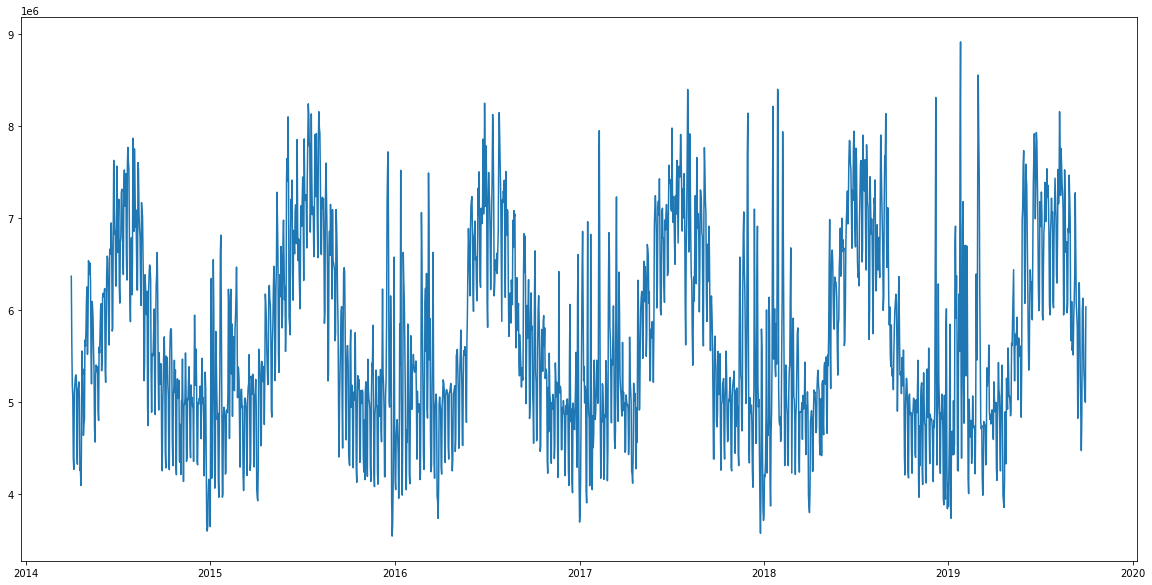

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ts_data.ds,ts_data.y)

In [18]:
def horizon_set(time_series,baseline_model,horizon=180,metric_eval=check_forecast):
  ts_train = time_series.iloc[:-horizon,:]
  ts_test = time_series.iloc[-horizon:,:]
  ts_test_1 = ts_test.copy(deep=True)
  ts_test_1['month'] = ts_test_1['ds'].dt.month
  ts_test_1['day'] = ts_test_1['ds'].dt.day
  bt= ts_test_1.merge(baseline_model,'inner',on=['month','day'])
  expected = np.array(ts_test.y)
  predictions = bt.y_y
  y_test = np.array(ts_test.y)
  rmse,mase,mae,mape = metric_eval(expected,predictions,y_test)
  plt.figure(figsize=(20,10))
  plt.plot(bt.ds,bt.y_x)
  plt.plot(bt.ds,bt.y_y,color='r')
  return ts_train,ts_test,bt.y_y,rmse,mase,mae,mape


RMSE =  527047.5616632937
MASE =  1.0720911126538615
MAE =  422085.2917194445
MAPE =  7.090495773407371


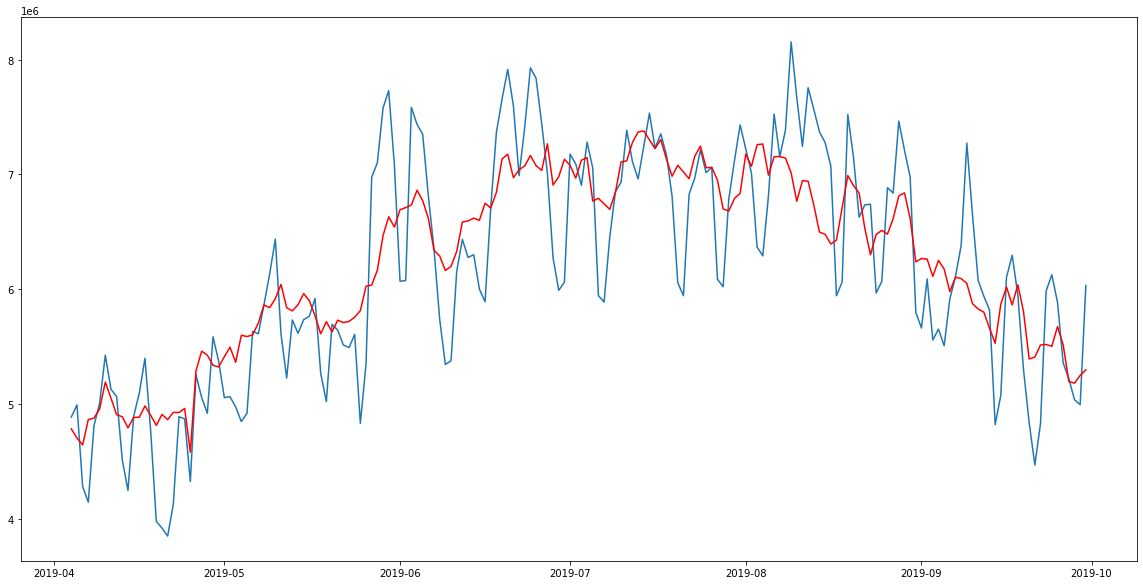

In [25]:
ts_train,ts_test,ts_base,rmse,mase,mae,mape = horizon_set(ts_data,baseline_model,180)

In [ ]:
ts_test.head()

,ds,y
1921,2019-04-04,4885117.834
1922,2019-04-05,4991246.994
1923,2019-04-06,4280720.872
1924,2019-04-07,4143412.337
1925,2019-04-08,4810168.720


In [ ]:
horizon = 180
ts_train = ts_data.iloc[:-horizon,:]
ts_test = ts_data.iloc[-horizon:,:]

In [ ]:
ts_test.head()

,ds,y
1921,2019-04-04,15.401704
1922,2019-04-05,15.423196
1923,2019-04-06,15.269632
1924,2019-04-07,15.237030
1925,2019-04-08,15.386243


In [ ]:
ts_test_1 = ts_test.copy(deep=True)

In [ ]:
#ts_test_1['year'] = ts_data_copy['ds'].dt.year
ts_test_1['month'] = ts_test_1['ds'].dt.month
ts_test_1['day'] = ts_test_1['ds'].dt.day

In [ ]:
ts_test_1.head()

,ds,y,month,day
1921,2019-04-04,4885117.834,4,4
1922,2019-04-05,4991246.994,4,5
1923,2019-04-06,4280720.872,4,6
1924,2019-04-07,4143412.337,4,7
1925,2019-04-08,4810168.720,4,8


In [ ]:
bt= ts_test_1.merge(baseline_model,'inner',on=['month','day'])

In [ ]:
bt.head()

,ds,y_x,month,day,y_y,year
0,2019-04-04,4885117.834,4,4,4.782240e+06,2016.5
1,2019-04-05,4991246.994,4,5,4.702581e+06,2016.5
2,2019-04-06,4280720.872,4,6,4.642575e+06,2016.5
3,2019-04-07,4143412.337,4,7,4.863753e+06,2016.5
4,2019-04-08,4810168.720,4,8,4.875285e+06,2016.5


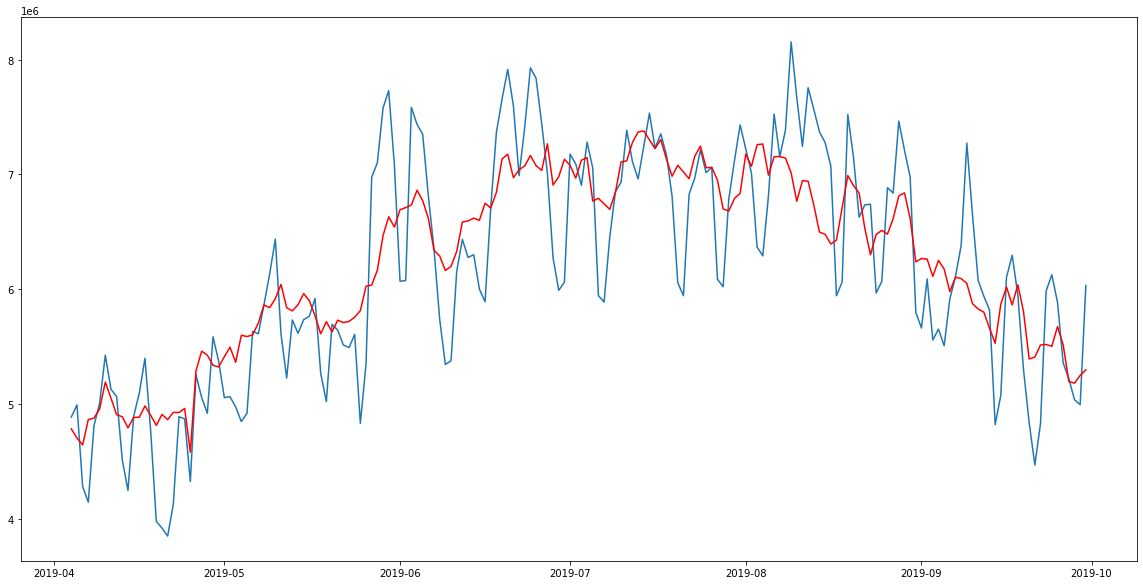

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(bt.ds,bt.y_x)
plt.plot(bt.ds,bt.y_y,color='r')

In [ ]:
m = NeuralProphet()
metrics = m.fit(ts_train, freq="D")

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/263 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.47E-01, min: 6.01E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.76E-01
Epoch[102/102]: 100%|██████████| 102/102 [00:17<00:00,  5.78it/s, SmoothL1Loss=0.0107, MAE=4.13e+5, MSE=3.35e+11, RegLoss=0]


In [ ]:
future = m.make_future_dataframe(ts_train, periods=horizon)
forecast = m.predict(future)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



In [ ]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
175,2019-09-26,None,5810182.0,NaN,5736025.0,-198903.906250,273060.593750
176,2019-09-27,None,5660160.5,NaN,5736324.0,-233488.546875,157324.953125
177,2019-09-28,None,4982812.0,NaN,5736623.0,-267680.000000,-486131.406250
178,2019-09-29,None,4832961.5,NaN,5736922.0,-301396.843750,-602564.000000
179,2019-09-30,None,5566868.0,NaN,5737221.0,-334556.437500,164203.109375


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#expected = [0.0, 0.5, 0.0, 0.5, 0.0]
#predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
def root_mean_square_error(expected,predictions):
    mse = mean_squared_error(expected, predictions)
    rmse = sqrt(mse)
    #print('RMSE: %f' % rmse)
    return(rmse)

In [13]:
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

In [14]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
from sklearn.metrics import mean_absolute_error
def check_forecast(expected,predictions,time_series):
    #rmse
    mse = mean_squared_error(expected, predictions)
    rmse = sqrt(mse)
    print('RMSE =  ' + str(rmse))
    
    #mase
    mase = mean_absolute_scaled_error(expected,predictions,time_series)
    print('MASE =  ' + str(mase))

    #mae
    mae = mean_absolute_error(expected, predictions)
    print('MAE =  ' + str(mae))

    #mape
    mape = mean_absolute_percentage_error(expected, predictions)
    print('MAPE =  ' + str(mape))
    
    return(rmse,mase,mae,mape)

In [ ]:
expected = np.array(ts_test.y)
predictions = bt.y_y
y_test = np.array(ts_test.y)
rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)

RMSE =  527047.5616632937
MASE =  1.0720911126538615
MAE =  422085.2917194445
MAPE =  7.090495773407371


In [ ]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)

RMSE =  534473.8173534444
MASE =  1.112374325062132
MAE =  437944.9059444444
MAPE =  7.360765667686368


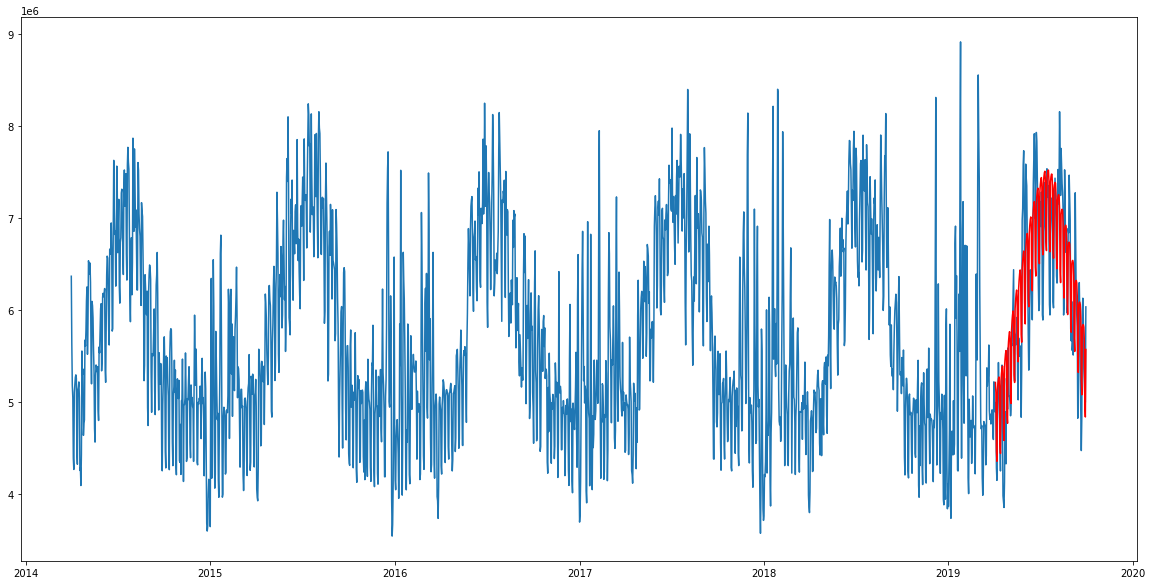

In [ ]:
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts_data.ds,ts_data.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')

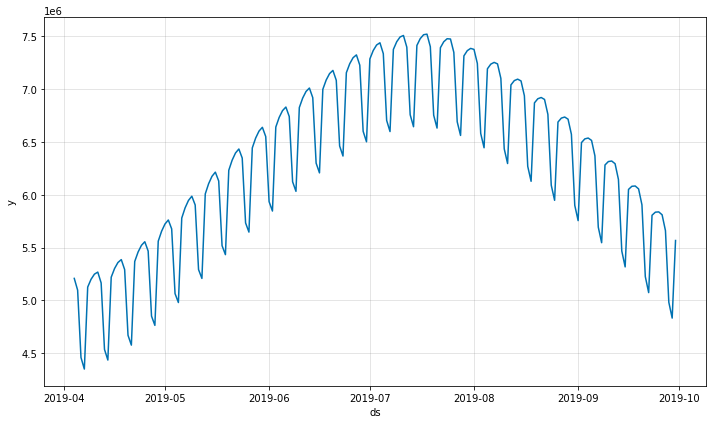

In [ ]:
forecasts_plot = m.plot(forecast)

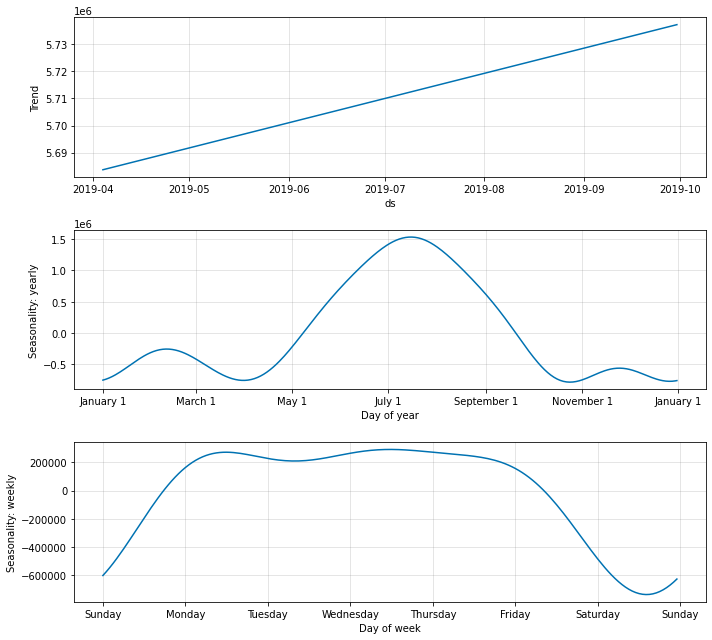

In [ ]:
fig_comp = m.plot_components(forecast)

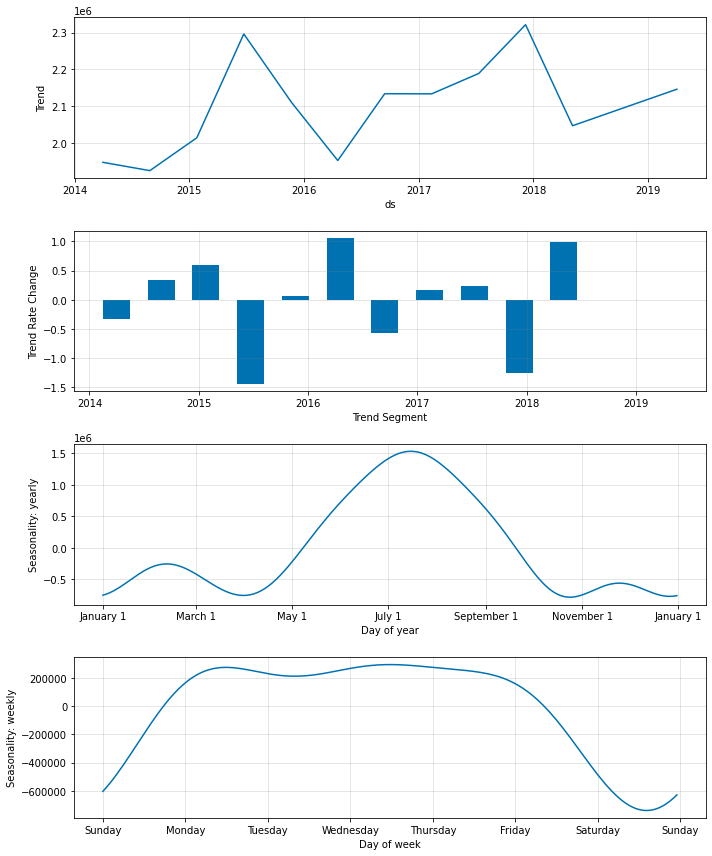

In [ ]:
fig_param = m.plot_parameters()

In [ ]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_reg=1,
)
train_metrics = m.fit(ts_train,freq='D')
val_metrics = m.test(ts_test)
forecast = m.predict(future)

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/263 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.54E-02, min: 3.94E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.58E-01
Epoch[102/102]: 100%|██████████| 102/102 [00:16<00:00,  6.03it/s, SmoothL1Loss=0.01, MAE=4.03e+5, MSE=3.14e+11, RegLoss=0.000526]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss        MAE              MSE
1         0.009 434290.500 279347527680.000
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



In [ ]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)

RMSE =  528533.4331332361
MASE =  1.1030923012348763
MAE =  434290.5470111111
MAPE =  7.369515299026489


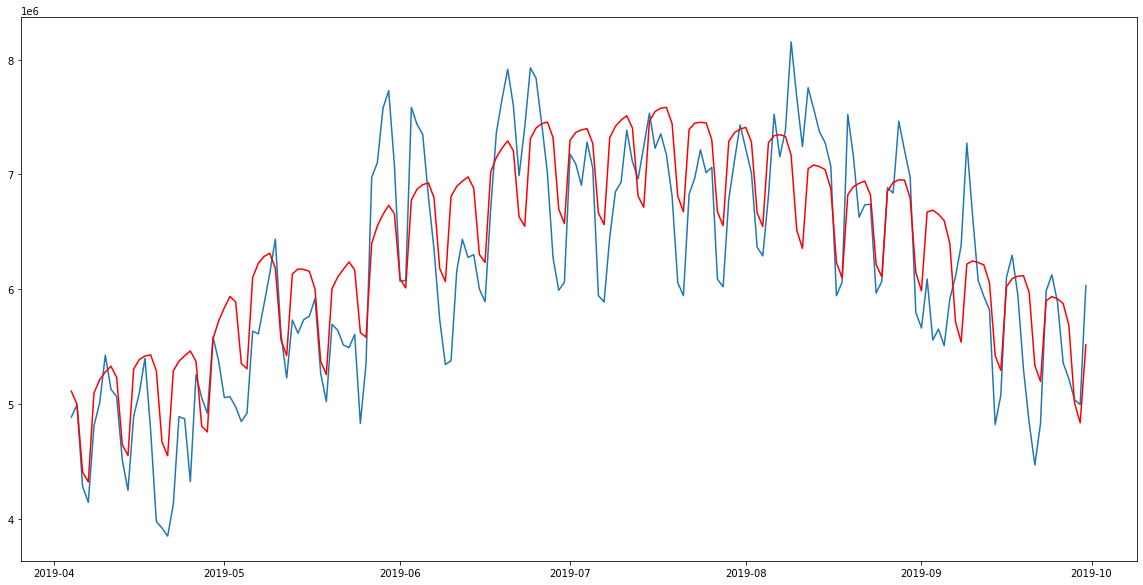

In [ ]:
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts_data.ds,ts_data.y)
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/263 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.45E-02, min: 3.36E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.54E-02
Epoch[102/102]: 100%|██████████| 102/102 [00:17<00:00,  5.98it/s, SmoothL1Loss=0.0101, MAE=4.02e+5, MSE=3.15e+11, RegLoss=0.00211]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss        MAE              MSE
1         0.009 430402.938 275177275392.000
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



RMSE =  524573.4833814944
MASE =  1.0932178995173707
MAE =  430402.96723333333
MAPE =  7.243379387282419


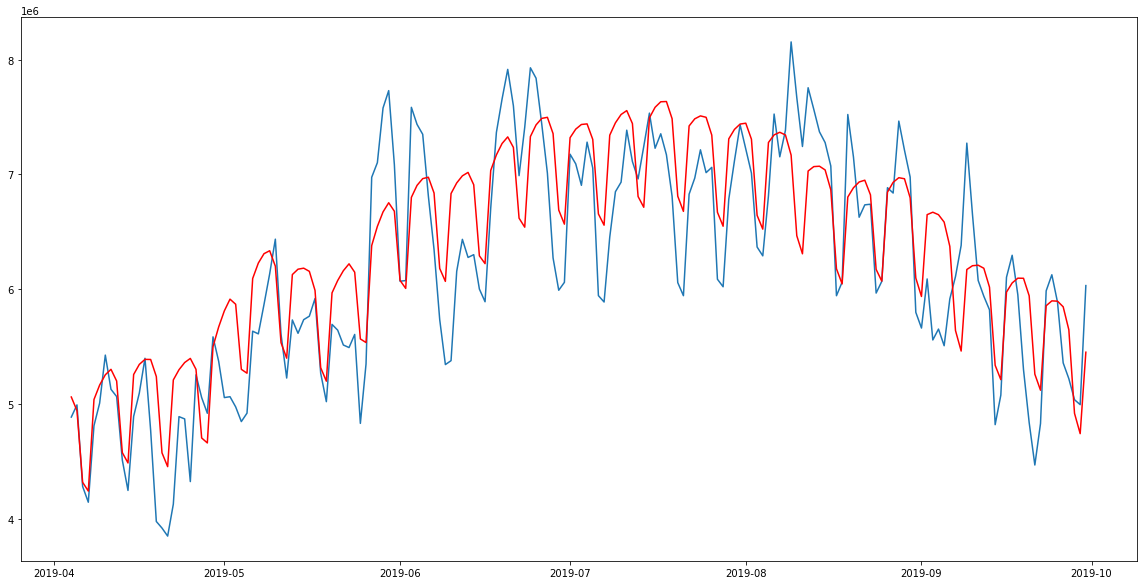

In [ ]:
 m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    seasonality_reg=1,
)
train_metrics = m.fit(ts_train,freq='D')
val_metrics = m.test(ts_test)
forecast = m.predict(future)
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')


In [ ]:
m = NeuralProphet(
    n_forecasts=horizon,
    n_lags=600,
    num_hidden_layers=4,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=50
)
train_metrics = m.fit(ts_train,freq='D')
#val_metrics = m.test(ts_test)
forecast = m.predict(future)
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.05E-05, min: 7.45E-04
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.39E-04
Epoch[102/102]: 100%|██████████| 102/102 [02:12<00:00,  1.30s/it, SmoothL1Loss=0.00724, MAE=3.57e+5, MSE=2.26e+11, RegLoss=0]


AttributeError: ignored

In [ ]:
m = NeuralProphet(
    n_forecasts=14,
    n_lags=20,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False
)
m.highlight_nth_step_ahead_of_each_forecast(step_number=m.n_forecasts)

In [ ]:
train_metrics = m.fit(ts_train,freq='D')
val_metrics = m.test(ts_val)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 19


  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 3.51E-02
Epoch[19/19]: 100%|██████████| 19/19 [00:04<00:00,  4.05it/s, SmoothL1Loss=0.000729, MAE=222, SmoothL1Loss-14=0.00127, MAE-14=302, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss     MAE  SmoothL1Loss-14  MAE-14
1         0.001 254.250            0.002 351.967


In [ ]:
future = m.make_future_dataframe(ts_train, periods=14,n_historic_predictions=len(ts_train))
forecast = m.predict(future)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 3358 historic forecasts, reduced to 3338.


In [ ]:
ts_train.head()

,ds,y
0,2001-03-30 12:00:00,6623.0
1,2001-03-31 12:00:00,6619.3
2,2001-04-01 12:00:00,6629.3
3,2001-04-02 12:00:00,6452.4
4,2001-04-03 12:00:00,6452.2


In [ ]:
from neuralprophet import set_random_seed 
set_random_seed(0)

In [ ]:

cp_num = [50,75,100,150,200]
cp_metrics = pd.DataFrame()

for cp in cp_num:  
  set_random_seed(0)
  m = NeuralProphet(
      n_lags=horizon,
      n_forecasts=horizon,
      changepoints_range=0.95,
      n_changepoints=cp,
      #trend_reg=1.5,
      #weekly_seasonality=False,
      #batch_size=64,
      #epochs=10,    
    #  learning_rate=1.0,
      #num_hidden_layers=2,
  )
  metrics = m.fit(ts_train, freq='D',valid_p=0.0)
  future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
  forecast = m.predict(future)
  df1=fcst_df_to_last_forecast(forecast,1)
  expected = np.array(ts_test.y)
  predictions = np.array(df1.tail(horizon).yhat1)
  #predictions = predictions.reshape(1,horizon)
  y_test = np.array(ts_test.y)
  rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)
  cp_metrics=cp_metrics.append({'changepoint':cp,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.43E-02, min: 5.34E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.11E-02
Epoch[102/102]: 100%|██████████| 102/102 [00:47<00:00,  2.17it/s, SmoothL1Loss=0.00899, MAE=3.8e+5, MSE=2.81e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  960384.3124023294
MASE =  2.07844792723405
MAE =  818290.8050777776
MAPE =  14.059631364820813


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.18E-03, min: 4.31E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.37E-02
Epoch[102/102]: 100%|██████████| 102/102 [00:58<00:00,  1.74it/s, SmoothL1Loss=0.00901, MAE=3.8e+5, MSE=2.82e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  812005.8854370075
MASE =  1.7027078277477397
MAE =  670360.8692444444
MAPE =  11.563773965930334


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.27E-02, min: 4.97E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.16E-02
Epoch[102/102]: 100%|██████████| 102/102 [01:08<00:00,  1.48it/s, SmoothL1Loss=0.0088, MAE=3.75e+5, MSE=2.75e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  810635.7866343379
MASE =  1.7106916712682645
MAE =  673504.1309333333
MAPE =  11.61928413773506


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-03, min: 4.31E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.43E-02
Epoch[102/102]: 100%|██████████| 102/102 [01:30<00:00,  1.13it/s, SmoothL1Loss=0.00887, MAE=3.76e+5, MSE=2.77e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  1082347.8651701768
MASE =  2.385601933304952
MAE =  939218.2026888888
MAPE =  16.04761159552281


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.61E-02, min: 6.16E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.63E-02
Epoch[102/102]: 100%|██████████| 102/102 [01:55<00:00,  1.13s/it, SmoothL1Loss=0.00862, MAE=3.71e+5, MSE=2.7e+11, RegLoss=0]


RMSE =  1197505.6928522312
MASE =  2.6734211277851707
MAE =  1052533.4304999998
MAPE =  17.902394595200047


In [ ]:
cp_metrics


,MASE,RMSE,changepoint
0,2.078448,9.603843e+05,50.0
1,1.702708,8.120059e+05,75.0
2,1.710692,8.106358e+05,100.0
3,2.385602,1.082348e+06,150.0
4,2.673421,1.197506e+06,200.0


In [ ]:
m = NeuralProphet(
      n_lags=horizon,
      n_forecasts=horizon,
      changepoints_range=0.95,
      n_changepoints=75,
      #trend_reg=0.0,
      #weekly_seasonality=False,
      #batch_size=64,
      #epochs=10,    
      #learning_rate=1.0,
      #num_hidden_layers=2,
)
metrics = m.fit(ts_train, freq='D',valid_p=0.0)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.82E-02, min: 5.74E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.92E-02
Epoch[102/102]: 100%|██████████| 102/102 [01:01<00:00,  1.67it/s, SmoothL1Loss=0.0088, MAE=3.75e+5, MSE=2.75e+11, RegLoss=0]


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



RMSE =  726577.70474431
MASE =  1.5002530461976726
MAE =  590653.8513222223
MAPE =  10.23492922132687


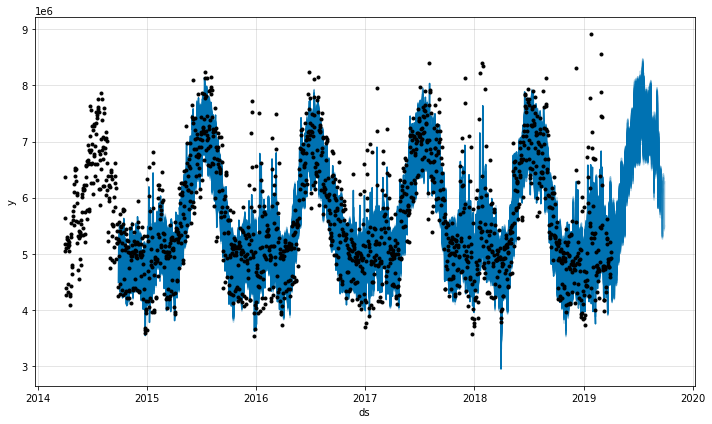

In [ ]:
future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)
df1=fcst_df_to_last_forecast(forecast,1)
expected = np.array(ts_test.y)
predictions = np.array(df1.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse,mase,mae,mape = check_forecast(expected,predictions,y_test)

In [ ]:
h_mult = [1,2,3,4,5]
lag_metrics = pd.DataFrame()

for h in h_mult:
  set_random_seed(0)
  m = NeuralProphet(
    n_lags=h*horizon,
    n_forecasts=horizon,
    changepoints_range=0.95,
    n_changepoints=75,
    #trend_reg=1.5,
    #weekly_seasonality=False,
    #batch_size=64,
    #epochs=10,    
    #learning_rate=1.0,
    #num_hidden_layers=2,
  )
  metrics = m.fit(ts_train, freq='D',valid_p=0.0)
  future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
  forecast = m.predict(future)
  df1=fcst_df_to_last_forecast(forecast,1)
  expected = np.array(ts_test.y)
  predictions = np.array(df1.tail(horizon).yhat1)
  #predictions = predictions.reshape(1,horizon)
  y_test = np.array(ts_test.y)
  rmse, mase, mae, mape = check_forecast(expected,predictions,y_test)
  lag_metrics=lag_metrics.append({'N_Lag':h*horizon,'RMSE':rmse,'MASE':mase},ignore_index=True)



INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.18E-03, min: 4.31E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.37E-02
Epoch[102/102]: 100%|██████████| 102/102 [00:59<00:00,  1.70it/s, SmoothL1Loss=0.00901, MAE=3.8e+5, MSE=2.82e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/255 [00:00<?, ?it/s]

RMSE =  812005.8854370075
MASE =  1.7027078277477397
MAE =  670360.8692444444
MAPE =  11.563773965930334


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.97E-03, min: 2.81E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.33E-02
Epoch[102/102]: 100%|██████████| 102/102 [00:54<00:00,  1.87it/s, SmoothL1Loss=0.00801, MAE=3.73e+5, MSE=2.51e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/252 [00:00<?, ?it/s]

RMSE =  1015931.6570417543
MASE =  2.129668914799855
MAE =  838456.6521999998
MAPE =  14.304303318248538


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.50E-03, min: 1.95E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 9.85E-03
Epoch[102/102]: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s, SmoothL1Loss=0.00647, MAE=3.41e+5, MSE=2.02e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/248 [00:00<?, ?it/s]

RMSE =  973115.1836400735
MASE =  2.0015587497018568
MAE =  788019.3192444444
MAPE =  12.979237605712141


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.97E-03, min: 1.77E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.16E-02
Epoch[102/102]: 100%|██████████| 102/102 [00:40<00:00,  2.50it/s, SmoothL1Loss=0.0042, MAE=2.79e+5, MSE=1.31e+11, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/244 [00:00<?, ?it/s]

RMSE =  1226955.1328189038
MASE =  2.4726042783789923
MAE =  973471.2710777776
MAPE =  15.97696669042539


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-03, min: 1.37E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 9.12E-03
Epoch[102/102]: 100%|██████████| 102/102 [00:33<00:00,  3.02it/s, SmoothL1Loss=0.00235, MAE=2.09e+5, MSE=7.34e+10, RegLoss=0]


RMSE =  1217718.1619108887
MASE =  2.458096987569529
MAE =  967759.709811111
MAPE =  15.964913120845159


In [ ]:
lag_metrics

,MASE,N_Lag,RMSE
0,1.702708,180.0,8.120059e+05
1,2.129669,360.0,1.015932e+06
2,2.001559,540.0,9.731152e+05
3,2.472604,720.0,1.226955e+06
4,2.458097,900.0,1.217718e+06


In [ ]:
ar_sp = [0.01,0.1,0.5,0.75,0.99]
ar_metrics = pd.DataFrame()
for ar in ar_sp:
  m = NeuralProphet(
        n_lags=horizon,
        n_forecasts=horizon,
        changepoints_range=0.95,
        n_changepoints=75,
        #trend_reg=1.5,
        #weekly_seasonality=False,
        #batch_size=64,
        #epochs=10,  
        ar_sparsity=ar,  
        #learning_rate=1.0,
        num_hidden_layers=2,
       
  )
  metrics = m.fit(ts_train, freq='D')
  future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
  forecast = m.predict(future)
  df1=fcst_df_to_last_forecast(forecast,1)
  expected = np.array(ts_test.y)
  predictions = np.array(df1.tail(horizon).yhat1)
  #predictions = predictions.reshape(1,horizon)
  y_test = np.array(ts_test.y)
  rmse, mase, mae, mape = check_forecast(expected,predictions,y_test)
  ar_metrics=ar_metrics.append({'ar_sparsity':ar,'RMSE':rmse,'MASE':mase, 'MAE':mae,'MAPE':mape},ignore_index=True)


INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.48E-02, min: 7.64E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 8.21E-02
Epoch[102/102]: 100%|██████████| 102/102 [01:31<00:00,  1.12it/s, SmoothL1Loss=0.00951, MAE=3.87e+5, MSE=2.97e+11, RegLoss=0.069]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  656003.5811104132
MASE =  1.4001095054397998
MAE =  551227.0571666667
MAPE =  9.476131033390276


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.31E-02, min: 7.05E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.78E-01
Epoch[102/102]: 100%|██████████| 102/102 [01:36<00:00,  1.05it/s, SmoothL1Loss=0.00912, MAE=3.79e+5, MSE=2.85e+11, RegLoss=0.000525]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  625837.9196292018
MASE =  1.3300408869471352
MAE =  523640.8446444444
MAPE =  8.991194330066607


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.16E-02, min: 7.05E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.13E-01
Epoch[102/102]: 100%|██████████| 102/102 [01:33<00:00,  1.09it/s, SmoothL1Loss=0.00934, MAE=3.83e+5, MSE=2.92e+11, RegLoss=0.000843]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  669071.3868950799
MASE =  1.4345799170058005
MAE =  564798.1553222223
MAPE =  9.713244810375498


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.03E-02, min: 1.94E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 7.29E-02
Epoch[102/102]: 100%|██████████| 102/102 [01:33<00:00,  1.09it/s, SmoothL1Loss=0.00952, MAE=3.87e+5, MSE=2.98e+11, RegLoss=0.000285]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 102
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  676608.4743633176
MASE =  1.4500110633942263
MAE =  570873.4411333334
MAPE =  9.815202544311497


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.73E-02, min: 4.59E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.99E-01
Epoch[102/102]: 100%|██████████| 102/102 [01:36<00:00,  1.06it/s, SmoothL1Loss=0.00931, MAE=3.83e+5, MSE=2.91e+11, RegLoss=7.41e-6]


RMSE =  676817.3767953537
MASE =  1.4542603297976955
MAE =  572546.3892888889
MAPE =  9.863416561842689


In [ ]:
ar_metrics

,MAE,MAPE,MASE,RMSE,ar_sparsity
0,551227.057167,9.476131,1.400110,656003.581110,0.01
1,523640.844644,8.991194,1.330041,625837.919629,0.10
2,564798.155322,9.713245,1.434580,669071.386895,0.50
3,570873.441133,9.815203,1.450011,676608.474363,0.75
4,572546.389289,9.863417,1.454260,676817.376795,0.99


In [ ]:
#epochs_num = [10,20,30,40,50]
epochs_num = [30,40,50,60,70]
ep_metrics = pd.DataFrame()
for ep in epochs_num:
  m = NeuralProphet(
        n_lags=horizon,
        n_forecasts=horizon,
        changepoints_range=0.95,
        #n_changepoints=15,
        #trend_reg=1.5,
        #weekly_seasonality=False,
        #batch_size=64,
        epochs=ep,  
        ar_sparsity=0.1,  
        #learning_rate=1.0,
        num_hidden_layers=2,
       
  )
  metrics = m.fit(ts_train, freq='D')
  future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
  forecast = m.predict(future)
  df1=fcst_df_to_last_forecast(forecast,1)
  expected = np.array(ts_test.y)
  predictions = np.array(df1.tail(horizon).yhat1)
  #predictions = predictions.reshape(1,horizon)
  y_test = np.array(ts_test.y)
  rmse, mase , mae, mape= check_forecast(expected,predictions,y_test)
  ep_metrics=ep_metrics.append({'epochs':ep,'RMSE':rmse,'MASE':mase,'MAE':mae,'MAPE':mape},ignore_index=True)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.64E-02, min: 8.74E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.88E-01
Epoch[30/30]: 100%|██████████| 30/30 [00:19<00:00,  1.53it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000565]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  538059.3798846044
MASE =  1.114869388119274


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.62E-02, min: 4.59E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.41E-01
Epoch[40/40]: 100%|██████████| 40/40 [00:27<00:00,  1.48it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.000743]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  538392.5034336642
MASE =  1.1163324383267297


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.64E-02, min: 1.01E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.27E-01
Epoch[50/50]: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.000665]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  529880.4415849266
MASE =  1.0933008458658742


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.63E-02, min: 8.14E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.13E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:40<00:00,  1.50it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.00115]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  519661.63920149906
MASE =  1.030987043407397


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.74E-02, min: 1.16E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.27E-01
Epoch[70/70]: 100%|██████████| 70/70 [00:48<00:00,  1.43it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.000745]


RMSE =  524363.0650936652
MASE =  1.0751065356098979


In [ ]:
ep_metrics

,MASE,RMSE,epochs
0,1.114869,538059.379885,30.0
1,1.116332,538392.503434,40.0
2,1.093301,529880.441585,50.0
3,1.030987,519661.639201,60.0
4,1.075107,524363.065094,70.0


In [ ]:
#epochs_num = [10,20,30,40,50]
batches = [30,40,50,60,70,100]
bt_metrics = pd.DataFrame()
for bt in batches:
  m = NeuralProphet(
        n_lags=horizon,
        n_forecasts=horizon,
        changepoints_range=0.95,
        #n_changepoints=15,
        #trend_reg=1.5,
        #weekly_seasonality=False,
        #batch_size=64,
        epochs=60,  
        batch_size=bt,
        ar_sparsity=0.5,  
        #learning_rate=1.0,
        num_hidden_layers=2,
       
  )
  metrics = m.fit(ts_train, freq='D')
  future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
  forecast = m.predict(future)
  df1=fcst_df_to_last_forecast(forecast,1)
  expected = np.array(ts_test.y)
  predictions = np.array(df1.tail(horizon).yhat1)
  #predictions = predictions.reshape(1,horizon)
  y_test = np.array(ts_test.y)
  rmse, mase = check_forecast(expected,predictions,y_test)
  bt_metrics=bt_metrics.append({'batches':bt,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.73E-02, min: 7.57E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.78E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:41<00:00,  1.44it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.000978]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  518399.72469530714
MASE =  1.042675483845795


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.23E-02, min: 3.21E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.49E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:33<00:00,  1.81it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000788]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  520697.7414377508
MASE =  1.0494092702723272


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.82E-02, min: 1.01E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.48E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:30<00:00,  1.98it/s, SmoothL1Loss=0.0106, MAE=4.14e+5, MSE=3.31e+11, RegLoss=0.000781]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  519158.5634870059
MASE =  1.0300745471860813


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.97E-02, min: 8.21E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 6.95E-02
Epoch[60/60]: 100%|██████████| 60/60 [00:26<00:00,  2.25it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.000497]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  519501.0958695815
MASE =  1.051893134442551


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.21E-02, min: 9.39E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.17E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:24<00:00,  2.45it/s, SmoothL1Loss=0.0108, MAE=4.22e+5, MSE=3.39e+11, RegLoss=0.000753]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



  0%|          | 0/258 [00:00<?, ?it/s]

RMSE =  519896.51198851643
MASE =  1.0374151704629724


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.01E-02, min: 7.57E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.84E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:21<00:00,  2.81it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.000743]


RMSE =  519279.9935018339
MASE =  1.0374618002198566


In [ ]:
bt_metrics

,MASE,RMSE,batches
0,1.042675,518399.724695,30.0
1,1.049409,520697.741438,40.0
2,1.030075,519158.563487,50.0
3,1.051893,519501.095870,60.0
4,1.037415,519896.511989,70.0
5,1.037462,519279.993502,100.0


In [ ]:
learning = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
lr_metrics = pd.DataFrame()
for lr in learning:
  m = NeuralProphet(
        n_lags=horizon,
        n_forecasts=horizon,
        changepoints_range=0.95,
        #n_changepoints=15,
        #trend_reg=1.5,
        #weekly_seasonality=False,
        #batch_size=64,
        epochs=60,  
        batch_size=70,
        ar_sparsity=0.5,  
        learning_rate=lr,
        num_hidden_layers=2,
       
  )
  metrics = m.fit(ts_train, freq='D')
  future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
  forecast = m.predict(future)
  df1=fcst_df_to_last_forecast(forecast,1)
  expected = np.array(ts_test.y)
  predictions = np.array(df1.tail(horizon).yhat1)
  #predictions = predictions.reshape(1,horizon)
  y_test = np.array(ts_test.y)
  rmse, mase = check_forecast(expected,predictions,y_test)
  lr_metrics=lr_metrics.append({'learning_rate':lr,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

Epoch[60/60]: 100%|██████████| 60/60 [00:24<00:00,  2.48it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000521]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  515117.7128494422
MASE =  1.0457231971120466


Epoch[60/60]: 100%|██████████| 60/60 [00:25<00:00,  2.39it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000924]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  521572.225929641
MASE =  1.06933589649705


Epoch[60/60]: 100%|██████████| 60/60 [00:24<00:00,  2.48it/s, SmoothL1Loss=0.011, MAE=4.28e+5, MSE=3.44e+11, RegLoss=0.000762]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  526031.9202328706
MASE =  1.0416597761598076


Epoch[60/60]: 100%|██████████| 60/60 [00:25<00:00,  2.38it/s, SmoothL1Loss=0.0109, MAE=4.23e+5, MSE=3.41e+11, RegLoss=0.000813]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  529239.1822640151
MASE =  1.045731905739362


Epoch[60/60]: 100%|██████████| 60/60 [00:24<00:00,  2.43it/s, SmoothL1Loss=0.0106, MAE=4.13e+5, MSE=3.3e+11, RegLoss=0.000929]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  518216.8360127868
MASE =  1.0255213263919747


Epoch[60/60]: 100%|██████████| 60/60 [00:25<00:00,  2.40it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000921]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  531720.9657515862
MASE =  1.0974488315616044


Epoch[60/60]: 100%|██████████| 60/60 [00:25<00:00,  2.39it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000883]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  522229.35421806807
MASE =  1.0670143058811625


Epoch[60/60]: 100%|██████████| 60/60 [00:24<00:00,  2.44it/s, SmoothL1Loss=0.0105, MAE=4.1e+5, MSE=3.28e+11, RegLoss=0.000814]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  526574.1566205944
MASE =  1.0831457846549422


Epoch[60/60]: 100%|██████████| 60/60 [00:25<00:00,  2.39it/s, SmoothL1Loss=0.0105, MAE=4.12e+5, MSE=3.3e+11, RegLoss=0.000841]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

  0%|          | 0/60 [00:00<?, ?it/s]

RMSE =  535306.258968791
MASE =  1.0538462732601634


Epoch[60/60]: 100%|██████████| 60/60 [00:24<00:00,  2.42it/s, SmoothL1Loss=0.0105, MAE=4.09e+5, MSE=3.28e+11, RegLoss=0.00112]


RMSE =  521651.3714970176
MASE =  1.0655272007841918


In [ ]:
lr_metrics


,MASE,RMSE,learning_rate
0,1.045723,515117.712849,0.1
1,1.069336,521572.225930,0.2
2,1.041660,526031.920233,0.3
3,1.045732,529239.182264,0.4
4,1.025521,518216.836013,0.5
5,1.097449,531720.965752,0.6
6,1.067014,522229.354218,0.7
7,1.083146,526574.156621,0.8
8,1.053846,535306.258969,0.9
9,1.065527,521651.371497,1.0


RMSE =  656757.0007059592
MASE =  1.0328366607368695
MAE =  478691.8053091325
MAPE =  8.72121713538102


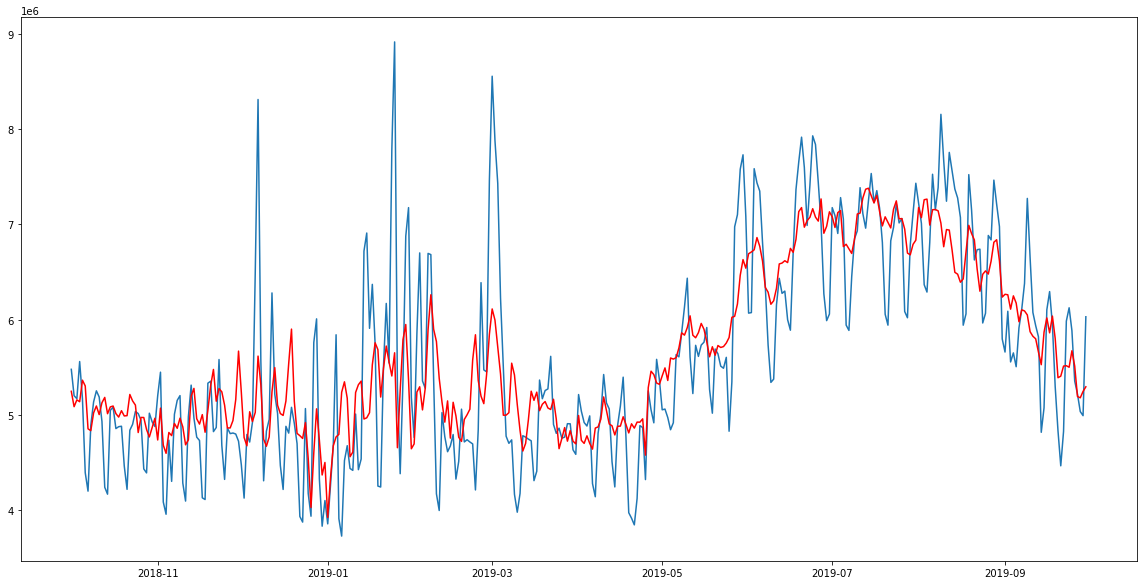

In [ ]:
horizon = 365
ts_train,ts_test,ts_base,rmse,mase,mae,mape = horizon_set(ts_data,baseline_model,horizon)

RMSE =  527047.5616632937
MASE =  1.0720911126538615
MAE =  422085.2917194445
MAPE =  7.090495773407371


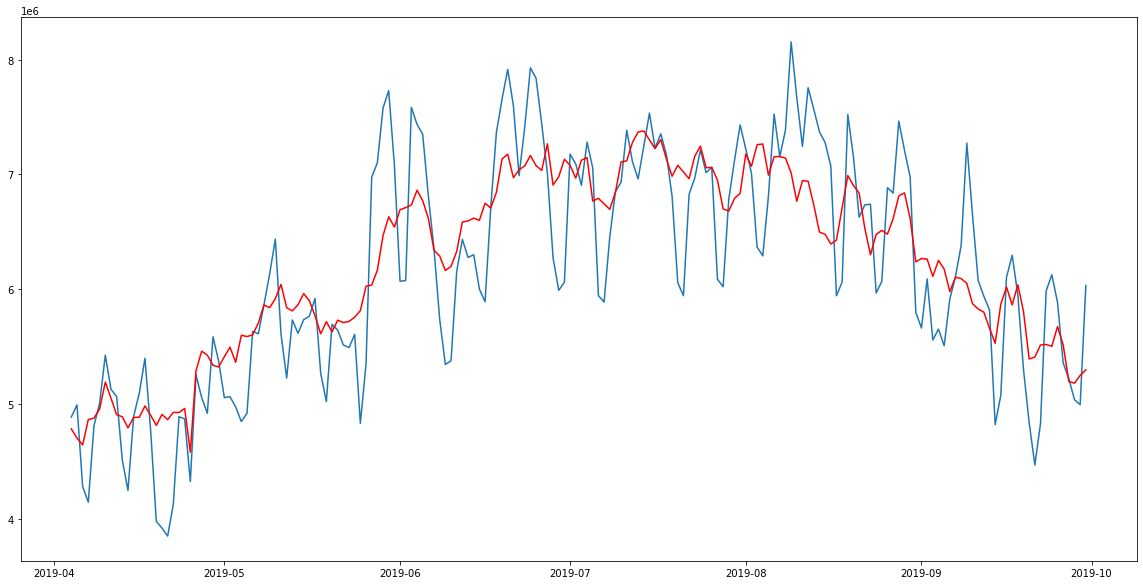

In [47]:
horizon = 180
ts_train,ts_test,ts_base,rmse,mase,mae,mape = horizon_set(ts_data,baseline_model,horizon)

RMSE =  0.08202532716332196
MASE =  1.023160534239476
MAE =  0.06565248043315261
MAPE =  0.419396512667754


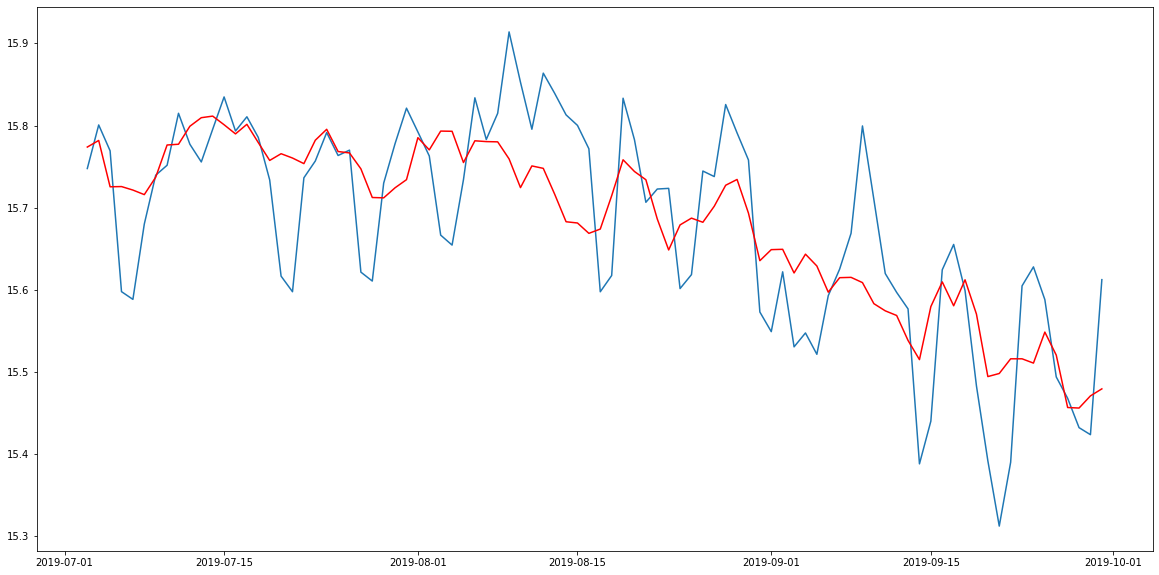

In [ ]:
horizon = 90
ts_train,ts_test,ts_base,rmse,mase,mae,mape = horizon_set(ts_data,baseline_model,horizon)

In [48]:
sea_mode = 'additive'
#sea_mode = 'multiplicative'
ff=50
from neuralprophet import set_random_seed 
#set_random_seed(0)
m = NeuralProphet(
        n_lags=4,
        n_forecasts=horizon,
        changepoints_range=0.95,
        #n_changepoints=100,
        #trend_reg_threshold=True,
        #trend_reg=0.5,
        #yearly_seasonality = 20,
        #weekly_seasonality=100,
        #weekly_seasonality=False,
        #batch_size=64,
        seasonality_mode = sea_mode,
        epochs=60,  
        batch_size=70,
        ar_sparsity=0.5,  
        #learning_rate=3.0,
        num_hidden_layers=2,
        #d_hidden = 2*horizon,
        #loss_func='HUBER'
     #   normalize='standardize',
       
)
m=m.add_events('event')
future_events_df = pd.DataFrame({'event':'event',
                                 'ds':ts_test.ds[ts_test.event==1]})
m.add_seasonality(name='period (days) = ' + str(7), period=7, fourier_order=ff)
m.add_seasonality(name='period (days) = ' + str(14), period=14, fourier_order=ff)
m.add_seasonality(name='period (days) = ' + str(21), period=21, fourier_order=ff)
m.add_seasonality(name='period (days) = ' + str(34), period=34, fourier_order=ff)
m.add_seasonality(name='period (days) = ' + str(28), period=28, fourier_order=ff)

metrics = m.fit(ts_train, freq='D',validate_each_epoch=False)
future = m.make_future_dataframe(ts_train, n_historic_predictions=True,events_df=future_events_df)
#future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
forecast = m.predict(future)
df1=fcst_df_to_last_forecast(forecast,1)
expected = np.array(ts_test.y)
predictions = np.array(df1.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase , mae, mape= check_forecast(expected,predictions,y_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.37E-04, min: 6.88E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.58E-02
Epoch[60/60]: 100%|██████████| 60/60 [00:53<00:00,  1.13it/s, SmoothL1Loss=0.00781, MAE=3.7e+5, MSE=2.44e+11, RegLoss=0.0014]


RMSE =  435786.79642496095
MASE =  0.8873453859284136
MAE =  349350.3785777779
MAPE =  5.734602099853644


Horizon = 180
RMSE =  435786.79642496095
MASE =  0.8873453859284136
MAE =  349350.3785777779
MAPE =  5.734602099853644


Text(0, 0.5, 'Energy Demand')

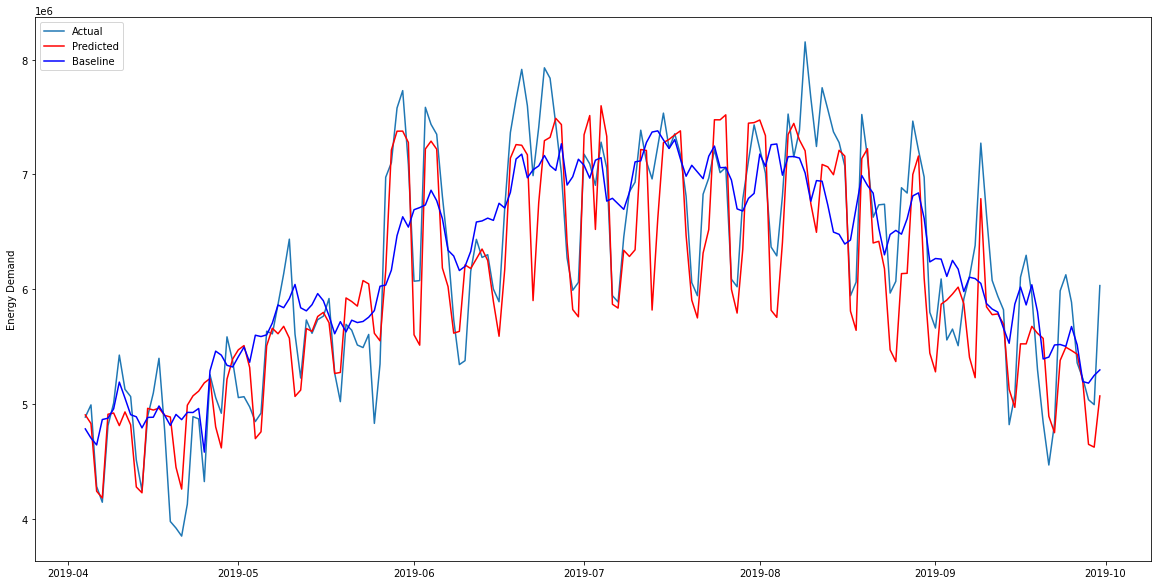

In [49]:
print('Horizon = ' + str(horizon))
rmse, mase , mae, mape= check_forecast(expected,predictions,y_test)
ts_predict = df1.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts.ds,ts.y)
plt.plot(ts_test.ds,ts_test.y,label ='Actual')
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r',label='Predicted')
plt.plot(ts_predict.ds,ts_base,color='b',label='Baseline')
plt.legend(loc='upper left')
plt.ylabel('Energy Demand')

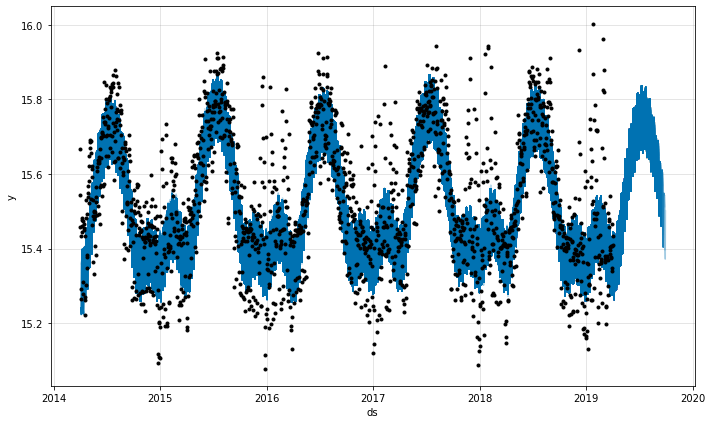

In [ ]:
forecasts_plot = m.plot(forecast)

Horizon = 365
RMSE =  562161.1466239826
MASE =  0.8872565703022631
MAE =  411219.37820000004
MAPE =  7.486470913719787


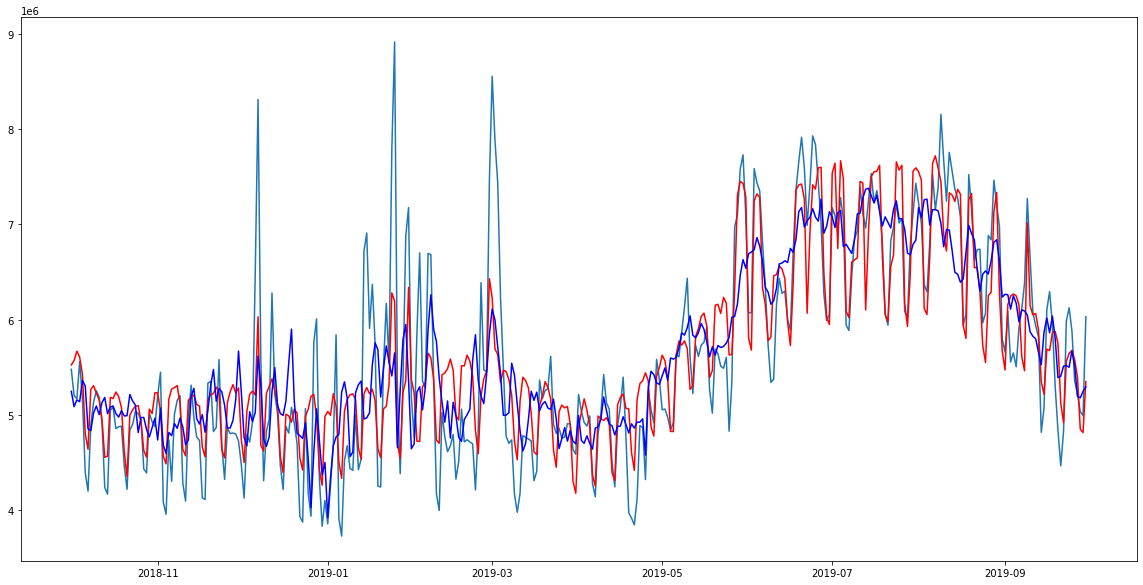

In [ ]:
print('Horizon = ' + str(horizon))
rmse, mase , mae, mape= check_forecast(expected,predictions,y_test)
ts_predict = df1.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts.ds,ts.y)
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')
plt.plot(ts_predict.ds,ts_base,color='b')

RMSE =  701622.8984759416
MASE =  1.0134015256311921
MAE =  469684.1468246575
MAPE =  8.025235279344242


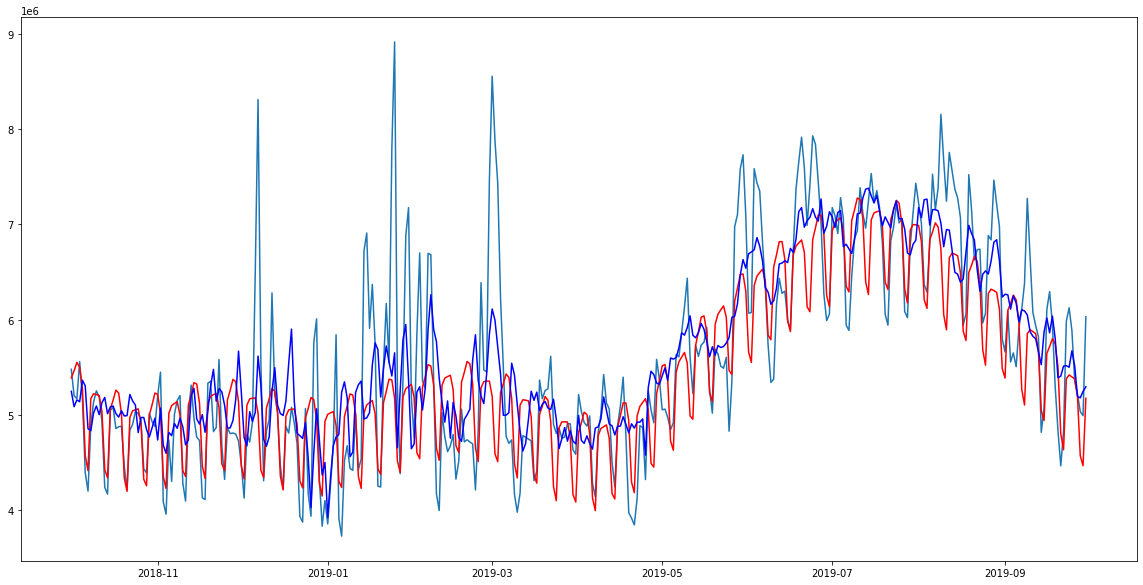

In [ ]:
rmse, mase , mae, mape= check_forecast(expected,predictions,y_test)
ts_predict = df1.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts.ds,ts.y)
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')
plt.plot(ts_predict.ds,ts_base,color='b')

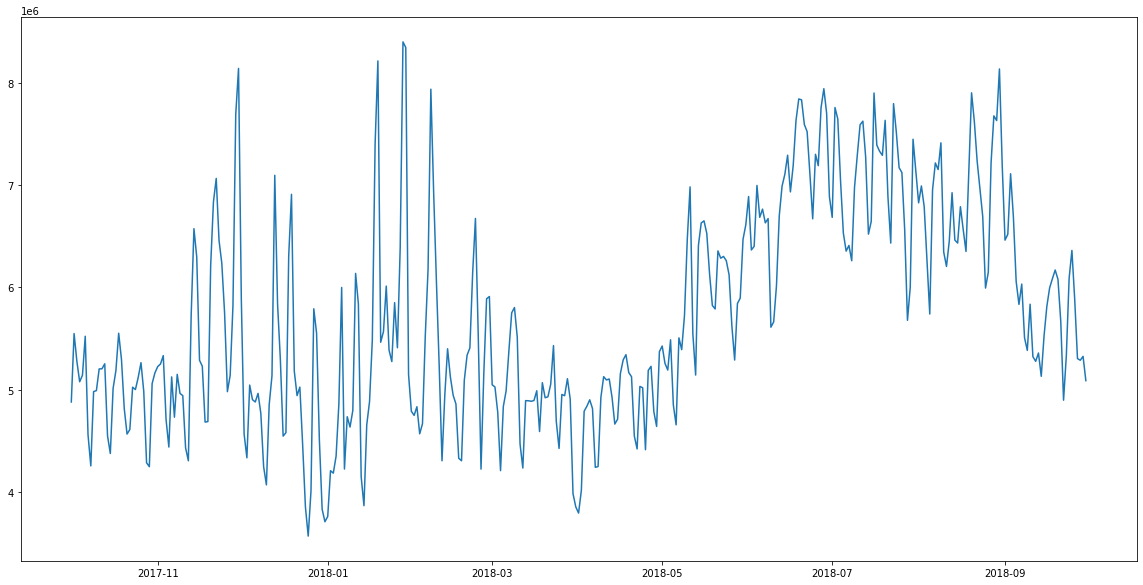

In [ ]:
plt.figure(figsize=(20,10))
ts_train_predict = df1.iloc[-2*365:-365,:]
plt.plot(ts_train.iloc[-365:,:].ds,ts_train.iloc[-365:,:].y)

In [ ]:
fig_comp = m.plot_components(forecast)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc6cafecae8> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fc6cad1a0d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
from neuralprophet import set_random_seed 
#set_random_seed(0)
m = NeuralProphet(
        n_lags=6*horizon,
        n_forecasts=horizon,
        changepoints_range=0.95,
        yearly_seasonality = 20,
        weekly_seasonality=100,
        #n_changepoints=15,
        #trend_reg=1.5,
        #weekly_seasonality=False,
        #batch_size=64,
        epochs=60,  
        batch_size=70,
        ar_sparsity=0.5,  
        #learning_rate=3.0,
        num_hidden_layers=3,
        d_hidden = 3*horizon,
        #loss_func='HUBER'
       
)
metrics = m.fit(ts_train, freq='D')
future = m.make_future_dataframe(ts_train, n_historic_predictions=True)
forecast = m.predict(future)
df1=fcst_df_to_last_forecast(forecast,1)
expected = np.array(ts_test.y)
predictions = np.array(df1.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase , mae, mape= check_forecast(expected,predictions,y_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


ValueError: ignored

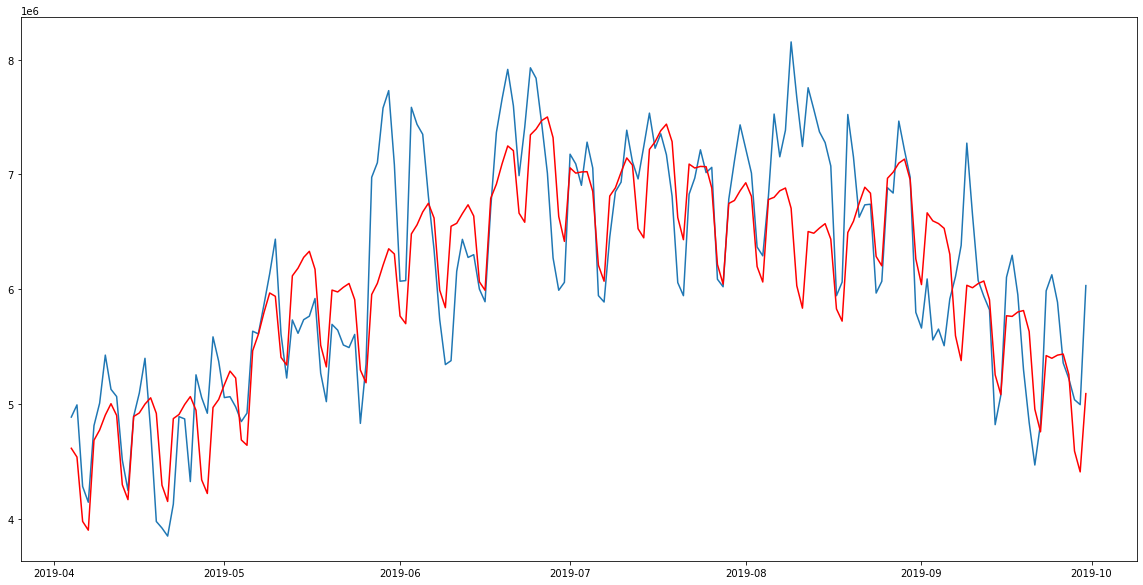

In [ ]:
ts_predict = df1.loc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts.ds,ts.y)
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')

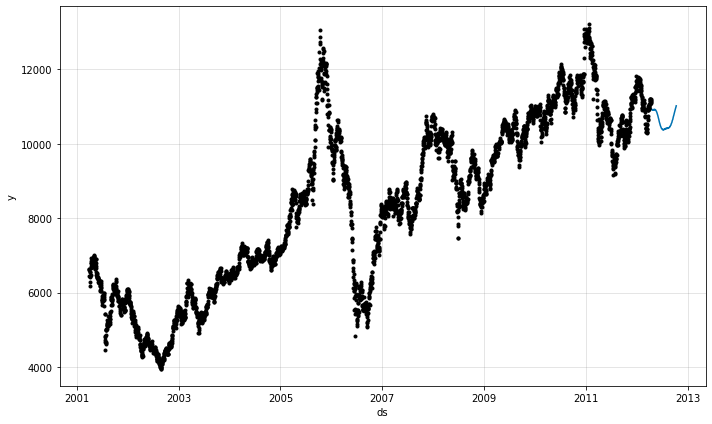

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(None) # reset highlight
fig = m.plot_last_forecast(forecast,plot_history_data=True)

In [ ]:


cols = ["ds", "y"]  # cols to keep from df
df = pd.concat((fcst[cols],), axis=1)
df.reset_index(drop=True, inplace=True)

yhat_col_names = [col_name for col_name in fcst.columns if "yhat" in col_name]
n_forecast_steps = len(yhat_col_names)
yhats = pd.concat((fcst[yhat_col_names],), axis=1)
cols = list(range(n_forecast_steps))
for i in range(n_last - 1, -1, -1):
    forecast_name = "yhat{}".format(i + 1)
    df[forecast_name] = None
    rows = len(df) + np.arange(-n_forecast_steps - i, -i, 1)
    last = yhats.values[rows, cols]
    df.loc[rows, forecast_name] = last

In [ ]:
from neuralprophet.utils import fcst_df_to_last_forecast

In [ ]:
fcst=forecast.copy()

In [ ]:
cols = ["ds", "y"]  # cols to keep from df
df = pd.concat((fcst[cols],), axis=1)
df.reset_index(drop=True, inplace=True)

yhat_col_names = [col_name for col_name in fcst.columns if "yhat" in col_name]
n_forecast_steps = len(yhat_col_names)

In [ ]:
yhats = pd.concat((fcst[yhat_col_names],), axis=1)

In [ ]:
df1=fcst_df_to_last_forecast(forecast,1)

In [ ]:
df1.tail(181)

,ds,y,yhat2,yhat1
4030,2012-04-11 12:00:00,11193.6,11098,None
4031,2012-04-12 12:00:00,NaN,11924,11094.4
4032,2012-04-13 12:00:00,NaN,11493.8,11946.4
4033,2012-04-14 12:00:00,NaN,11379.7,11525.4
4034,2012-04-15 12:00:00,NaN,11661.8,11368.6
...,...,...,...,...
4206,2012-10-04 12:00:00,NaN,11618.3,11463.7
4207,2012-10-05 12:00:00,NaN,11483,11619.2
4208,2012-10-06 12:00:00,NaN,11717.1,11516.8
4209,2012-10-07 12:00:00,NaN,11481.4,11717.7


In [ ]:
n_last = 1
cols = list(range(n_forecast_steps))

for i in range(n_last - 1, -1, -1):
    print(i)
    forecast_name = "yhat{}".format(i + 1)
    df[forecast_name] = None
    rows = len(df) + np.arange(-n_forecast_steps - i, -i, 1)
    last = yhats.values[rows, cols]
    df.loc[rows, forecast_name] = last

0


,ds,y,yhat1
4029,2012-04-10 12:00:00,11162.0,None
4030,2012-04-11 12:00:00,11193.6,None
4031,2012-04-12 12:00:00,NaN,11094.4
4032,2012-04-13 12:00:00,NaN,11946.4
4033,2012-04-14 12:00:00,NaN,11525.4
...,...,...,...
4206,2012-10-04 12:00:00,NaN,11463.7
4207,2012-10-05 12:00:00,NaN,11619.2
4208,2012-10-06 12:00:00,NaN,11516.8
4209,2012-10-07 12:00:00,NaN,11717.7


In [ ]:
yhats.tail(182)

,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,yhat9,yhat10,yhat11,yhat12,yhat13,yhat14,yhat15,yhat16,yhat17,yhat18,yhat19,yhat20,yhat21,yhat22,yhat23,yhat24,yhat25,yhat26,yhat27,yhat28,yhat29,yhat30,yhat31,yhat32,yhat33,yhat34,yhat35,yhat36,yhat37,yhat38,yhat39,yhat40,...,yhat141,yhat142,yhat143,yhat144,yhat145,yhat146,yhat147,yhat148,yhat149,yhat150,yhat151,yhat152,yhat153,yhat154,yhat155,yhat156,yhat157,yhat158,yhat159,yhat160,yhat161,yhat162,yhat163,yhat164,yhat165,yhat166,yhat167,yhat168,yhat169,yhat170,yhat171,yhat172,yhat173,yhat174,yhat175,yhat176,yhat177,yhat178,yhat179,yhat180
4029,11103.2,11910.1,11394.7,11384.3,11376.7,11279.6,11315.2,11124.6,11555.4,11304.6,11034.5,11216.4,11104.1,11495,11401.9,11079.3,11218.3,11338.1,11481.1,11228.8,11136.6,11187.7,11030.9,10895.8,11409.2,10708.9,11062.9,10829.9,10870.4,11158.1,10860.9,10644.3,11056.5,10910.2,11025.6,11194.3,10821.9,11106.5,11226.5,11150.5,...,11047.8,11272.4,11084.7,11300.9,11506.3,10986.2,11268.6,11198.7,11162.3,10875.4,11096,11179.1,11086.6,11004.8,11120.5,11514.7,11488.3,11313.9,10976.8,11034.2,11153.4,11461.6,11218.5,11263.2,11161.2,10905.1,11565.4,11265.9,11094.9,11406.3,11225.7,11248.7,11146.4,11305.6,11272.5,11012.7,10962.3,11294.8,10956.3,11013.6
4030,11098,11928.8,11431.7,11366.5,11430.2,11298.6,11328.9,11120.7,11546.4,11311.5,11020.4,11302.6,11115.9,11513.7,11403.4,11081.8,11243.8,11355,11411.3,11246.7,11144.9,11224.8,11014,10957,11381.6,10754.1,11065.8,10832.8,10866.5,11157.1,10843.7,10652,11012.1,10897.1,11047.3,11181.6,10832.8,11070.6,11223.5,11114.9,...,11023.1,11295,11163.3,11341.3,11465.6,10990.1,11339.1,11190.7,11247.8,10855.6,11142.6,11186.9,11110,11006.3,11179.9,11527.5,11500.3,11324,10997.1,11057.1,11200.5,11505.9,11189,11240.9,11139.7,10905.1,11567.2,11245.7,11080.4,11448.6,11235,11226.2,11164.7,11307.3,11303.3,11040,11005.5,11292.8,10976.6,11023.4
4031,11094.4,11924,11451.7,11346.1,11488.7,11307.5,11341.4,11116.6,11514.1,11311.3,11026.4,11383.6,11129.6,11510.8,11388.8,11066.9,11258.3,11378.3,11328.3,11236.8,11137.3,11236,10994.2,11021,11370,10759.6,11072.7,10842,10861.9,11146.9,10845.8,10657.2,10958.4,10869.4,11034.9,11155.3,10831.9,11055.8,11224.6,11039.9,...,10981.3,11320.3,11214.3,11363.9,11410,10976.2,11423.3,11170.1,11301.1,10822.3,11175.2,11165,11121.7,11008.5,11228.1,11493.2,11520.8,11332,10975.1,11072.5,11230.1,11525.7,11141.5,11214.7,11102.6,10903,11542.4,11222.4,11048.1,11476.1,11258,11196.9,11133.1,11315.5,11307.1,11027,11065.8,11272.9,10987.7,10982
4032,None,11946.4,11493.8,11361.2,11558.6,11321.7,11373,11126.7,11506.9,11314.4,11020.3,11482.5,11156.8,11530.3,11370.3,11065.4,11267.3,11408.6,11280.1,11231.9,11138.1,11252.8,11002.5,11099.6,11388.6,10801.7,11091.4,10890.1,10872.3,11178.7,10868.1,10699.3,10935.7,10873.3,11050.6,11163.3,10871.8,11083.2,11247.8,10999.7,...,10981.5,11335.5,11283.1,11422,11396.8,10963.5,11516.1,11164.4,11386.6,10838.4,11226.9,11178.2,11187.7,11016.5,11299.5,11477.3,11530.6,11337.8,10967.5,11107.8,11277.5,11540.9,11155.9,11230.8,11082.1,10916.2,11527.3,11255.9,11035.6,11485,11311.6,11196.2,11118.1,11333.3,11329.9,11041.1,11116.9,11280.1,11005,10993.2
4033,None,None,11525.4,11379.7,11619.2,11358.4,11407.5,11158.9,11497.4,11322.8,11040.1,11553,11182.7,11558.9,11370.2,11085.4,11287.3,11449.1,11255.1,11222.2,11170.7,11269.8,11017.9,11167,11407.3,10859.1,11109,10933.2,10896.4,11213.5,10893.5,10765.8,10931.8,10873.2,11054.2,11175.3,10936.5,11108.1,11251.3,10954.8,...,10985.3,11359.1,11355,11463.8,11408,10974,11581.4,11167.5,11465.6,10856.7,11284.1,11199.8,11262.8,11055.7,11375.8,11492.9,11529.3,11351.7,10973.5,11145.6,11305.3,11568,11173.2,11220.4,11075.4,10908.1,11518.5,11265.3,11035.4,11496.7,11366.3,11226.5,11115.7,11326.4,11338.4,11069.8,11146.5,11245.9,11057.7,11004.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
ts_test.tail()

,ds,y
4206,2012-10-04 12:00:00,13408.5
4207,2012-10-05 12:00:00,13421.5
4208,2012-10-06 12:00:00,13471.4
4209,2012-10-07 12:00:00,13271.5
4210,2012-10-08 12:00:00,13325.0


RMSE =  1950.0014731060185
MASE =  30.391523358897043


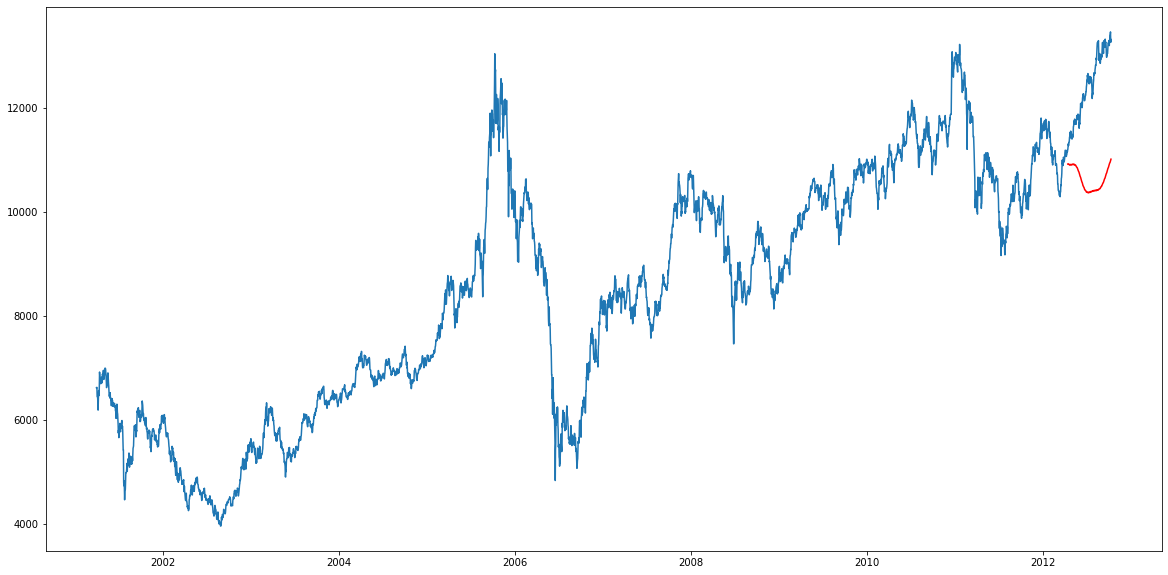

In [ ]:
df1=fcst_df_to_last_forecast(forecast,1)
expected = np.array(ts_test.y)
predictions = np.array(df1.tail(horizon).yhat1)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase = check_forecast(expected,predictions,y_test)
ts_predict = df1.loc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts.ds,ts.y)
plt.plot(ts_predict.ds,ts_predict.yhat1,color='r')
